Objetivo: Clasificar latidos cardíacos (señales ECG) en 5 categorías de arritmias usando el dataset MIT-BIH.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical



In [17]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/modulo 6/mitbih_train.csv", header=None)

# Limpieza: eliminar filas con NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
y = to_categorical(y)  # 5 clases


df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = X.reshape(X.shape[0], X.shape[1], 1)  # (muestras, pasos, características)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Modelo LSTM
model = Sequential([
    LSTM(64, input_shape=(X.shape[1], 1)),
    Dropout(0.3),
    Dense(y.shape[1], activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

# Evaluación

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n🔍 Precisión en test: {test_acc*100:.2f}%\n")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8171 - loss: 0.7302 - val_accuracy: 0.8325 - val_loss: 0.6245
Epoch 2/15
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8253 - loss: 0.6290 - val_accuracy: 0.8327 - val_loss: 0.5428
Epoch 3/15
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8243 - loss: 0.5751 - val_accuracy: 0.8453 - val_loss: 0.5811
Epoch 4/15
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8408 - loss: 0.5981 - val_accuracy: 0.8488 - val_loss: 0.5902
Epoch 5/15
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8413 - loss: 0.6012 - val_accuracy: 0.8314 - val_loss: 0.5546
Epoch 6/15
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8361 - loss: 0.5402 - val_accuracy: 0.8326 - val_loss: 0.8229
Epoch 7/15
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8561 - loss: 0.5131 - val_accuracy: 0.8961 - val_loss: 0.3825
Epoch 8/15
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8726 -

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,665 (201.82 KB)

 Trainable params: 17,221 (67.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,444 (134.55 KB)

In [26]:
y_pred = model.predict(X_test)  # Predicciones en formato one-hot
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir a clases (0, 1, 2, 3, 4)
y_true = np.argmax(y_test, axis=1)

548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


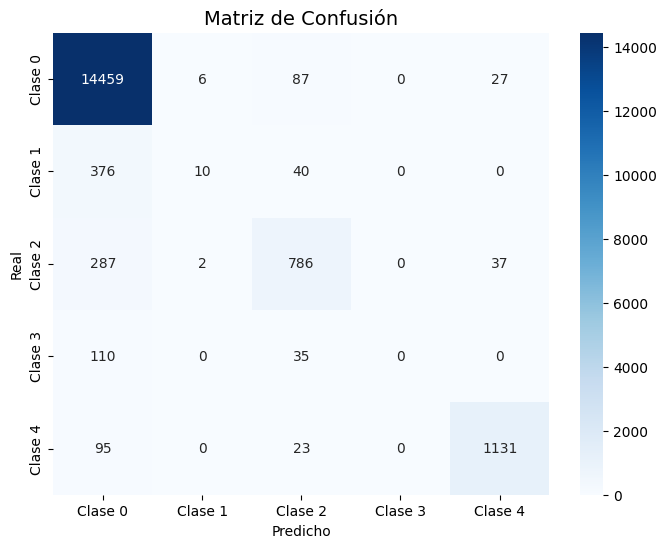


 Reporte de Clasificación:
              precision    recall  f1-score   support

     Clase 0       0.94      0.99      0.97     14579
     Clase 1       0.56      0.02      0.05       426
     Clase 2       0.81      0.71      0.75      1112
     Clase 3       0.00      0.00      0.00       145
     Clase 4       0.95      0.91      0.93      1249

    accuracy                           0.94     17511
   macro avg       0.65      0.53      0.54     17511
weighted avg       0.92      0.94      0.92     17511



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4'],
            yticklabels=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4'])
plt.title('Matriz de Confusión', fontsize=14)
plt.xlabel('Predicho'), plt.ylabel('Real')
plt.show()
print("\n Reporte de Clasificación:")
print(classification_report(y_true, y_pred_classes, target_names=[f'Clase {i}' for i in range(5)]))

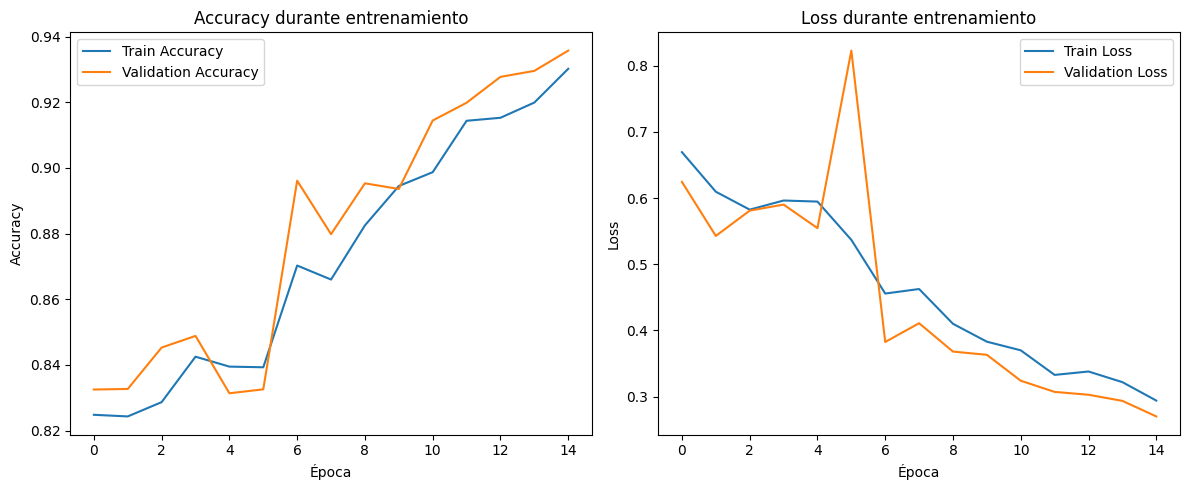

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


#Curva de entrenamiento (Accuracy/Loss)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante entrenamiento', fontsize=12)
plt.xlabel('Época'), plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss durante entrenamiento', fontsize=12)
plt.xlabel('Época'), plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()




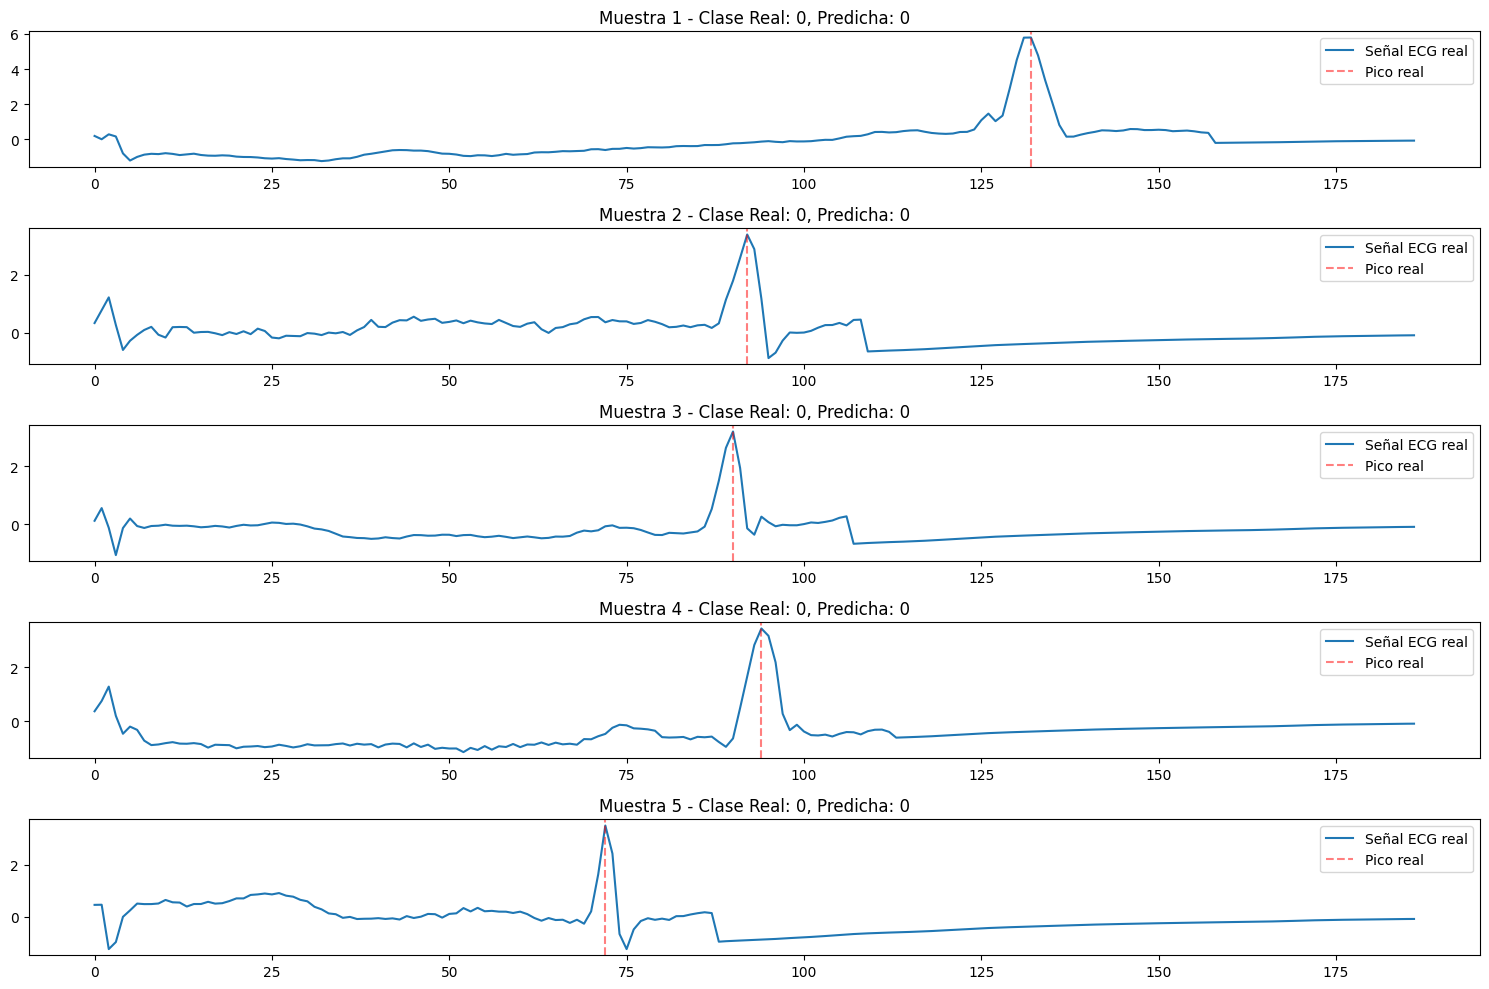


📊 Reporte de Clasificación:
              precision    recall  f1-score   support

     Clase 0       0.94      0.99      0.97     14579
     Clase 1       0.56      0.02      0.05       426
     Clase 2       0.81      0.71      0.75      1112
     Clase 3       0.00      0.00      0.00       145
     Clase 4       0.95      0.91      0.93      1249

    accuracy                           0.94     17511
   macro avg       0.65      0.53      0.54     17511
weighted avg       0.92      0.94      0.92     17511



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
#Ejemplo de señal ECG predicha vs real (5 muestras aleatorias)
np.random.seed(42)
sample_indices = np.random.randint(0, len(X_test), 5)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(sample_indices, 1):
    plt.subplot(5, 1, i)
    plt.plot(X_test[idx], label='Señal ECG real', linewidth=1.5)
    plt.axvline(x=np.argmax(X_test[idx]), color='red', linestyle='--', alpha=0.5, label='Pico real')
    plt.title(f'Muestra {i} - Clase Real: {y_true[idx]}, Predicha: {y_pred_classes[idx]}')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# --- 5. Métricas detalladas ---
print("\nReporte de Clasificación:")
print(classification_report(y_true, y_pred_classes, target_names=[f'Clase {i}' for i in range(5)]))

Se usó el modelo LSTM dada la naturaleza de las señales ECG pues cada latido está temporalmente relacionado con las anteriores. La base de datos utilizada contiene registros de actividad cardiaca con anomalías como arritmias, por lo cual este tipo de red neuronal es adecuada para identificar dichos patrones anómalos.


El optimizador utilizado fue Adam dado que se adapta automáticamente durante el proceso de entrenamiento. Este método ajusta individualmente las tasas de aprendizaje de cada parámetro permitiendo un entrenamiento más estable y eficiente a diferencia de otro tipo de optimizadores.